In [61]:
#pip install holidays

  Created wheel for holidays: filename=holidays-0.10.2-cp37-none-any.whl size=111568 sha256=70275c9f2d8cc4acebcbc735bc5f323174f6cfa620b92ae2096b809bba5daab9
  Stored in directory: C:\Users\sumic\AppData\Local\pip\Cache\wheels\68\55\29\95836cc75cbf85e6b7382e3e569613d6c050fcbe38d776ea64
  Created wheel for pymeeus: filename=PyMeeus-0.3.7-cp37-none-any.whl size=702881 sha256=6b22b632c128ae43def934ddfe23d24cb97ba3c45070cc7feff2983ac58ad4f6
  Stored in directory: C:\Users\sumic\AppData\Local\pip\Cache\wheels\8d\1a\e7\684cd77a99aac294f976db834fe613b5424f7c4d75ffb0b84d
Successfully built holidays pymeeus
Note: you may need to restart the kernel to use updated packages.


In [62]:
import numpy as np
from collections import Counter
import pandas as pd
import re
import holidays
from datetime import date
import datetime
import calendar

In [30]:
lond_calender_listdf = pd.read_csv('C:/HOMEWORK/Boston-Airbnb-data-analysis/data/london_calendar.csv')


In [31]:
lond_calender_listdf.fillna(0, inplace=True)
lond_calender_listdf = lond_calender_listdf[lond_calender_listdf.price != 0]

In [32]:
lond_calender_listdf

,listing_id,date,available,price
0,13913.0,5/1/2020,t,$49.00
1,15400.0,5/1/2020,f,$75.00
2,59656.0,5/1/2020,t,$70.00
3,62218.0,5/1/2020,t,$65.00
4,140518.0,5/1/2020,f,$60.00
...,...,...,...,...
703930,2153806.0,12/31/2020,t,$75.00
703931,1990616.0,12/31/2020,f,$95.00
703932,1992428.0,12/31/2020,t,$213.00
703933,2157833.0,12/31/2020,t,$110.00


In [46]:
len(lond_calender_listdf)

703935

In [47]:
listing_price = lond_calender_listdf['price']
listing_prices = []
len(listing_price)

703935

In [48]:
for p in listing_price:
    p = re.sub('[^0-9.]+','', p)
    listing_prices.append(float(p))

In [49]:
len(listing_prices)

703935

In [50]:
lond_calender_listdf['price'] = listing_prices

lond_calender_listdf = lond_calender_listdf[lond_calender_listdf.price >= 0]

In [65]:
lond_calender_listdf['Month'],lond_calender_listdf['Day'],lond_calender_listdf['Year']=lond_calender_listdf['date'].str.split('/',2).str
lond_calender_listdf.head()

,listing_id,date,available,price,Year,Month,Day,Day_Name,Holiday,US_holidays_name,day_Name,holiday,us_holidays_name
0,13913.0,5/1/2020,t,49.0,2020,5,1,default,False,working,Sunday,False,NaN
1,15400.0,5/1/2020,f,75.0,2020,5,1,default,False,working,Sunday,False,NaN
2,59656.0,5/1/2020,t,70.0,2020,5,1,default,False,working,Sunday,False,NaN
3,62218.0,5/1/2020,t,65.0,2020,5,1,default,False,working,Sunday,False,NaN
4,140518.0,5/1/2020,f,60.0,2020,5,1,default,False,working,Sunday,False,NaN


In [66]:
year_dataframe = lond_calender_listdf.groupby(['Year','Month']).price.mean()
year_dataframe = year_dataframe.reset_index()
year_dataframe = year_dataframe.rename(columns={'price':'average_Price'})
year_dataframe['year-Month'] = year_dataframe['Year'].map(str) + "-" + year_dataframe['Month'].map(str)
year_dataframe.to_csv('/data/year_month_data.csv')
year_dataframe.head(50)

,Year,Month,average_Price,year-Month
0,2020,10,106.975096,2020-10
1,2020,11,106.509305,2020-11
2,2020,12,107.667180,2020-12
3,2020,5,104.090141,2020-5
4,2020,6,106.277383,2020-6
5,2020,7,108.339260,2020-7
6,2020,8,107.458237,2020-8
7,2020,9,106.725061,2020-9


Text(0, 0.5, 'Average Price')

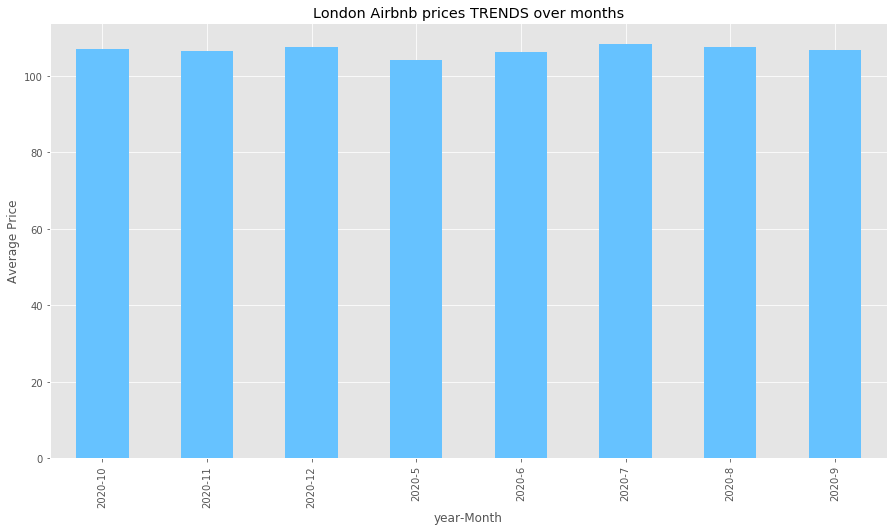

In [67]:
#Trend of Average Price on a Monthly basis.

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

objects = year_dataframe['year-Month']
y_pos = year_dataframe['average_Price']

year_dataframe.plot(kind='bar', 
           x='year-Month',
           y='average_Price',
           color = '#66c2ff', 
           figsize =(15,8), 
           title = 'London Airbnb prices TRENDS over months', 
           legend = False)
plt.ylabel('Average Price')

In [84]:
import holidays
import calendar

us_holidays = holidays.US()

from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
cal = calendar()

cal = calendar()
holidays = cal.holidays(start=lond_calender_listdf['date'].min(),
                        end=lond_calender_listdf['date'].max()).to_pydatetime()

lond_calender_listdf['Holiday'] = lond_calender_listdf['date'].isin(holidays)


In [85]:
lond_calender_listdf

,listing_id,date,available,price,Year,Month,Day,Day_Name,Holiday,US_holidays_name,day_Name,holiday,us_holidays_name
0,13913.0,5/1/2020,t,49.0,2020,5,1,default,False,working,Friday,False,0.0
1,15400.0,5/1/2020,f,75.0,2020,5,1,default,False,working,Friday,False,0.0
2,59656.0,5/1/2020,t,70.0,2020,5,1,default,False,working,Friday,False,0.0
3,62218.0,5/1/2020,t,65.0,2020,5,1,default,False,working,Friday,False,0.0
4,140518.0,5/1/2020,f,60.0,2020,5,1,default,False,working,Friday,False,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
703930,2153806.0,12/31/2020,t,75.0,2020,12,31,default,False,working,0,0,0.0
703931,1990616.0,12/31/2020,f,95.0,2020,12,31,default,False,working,0,0,0.0
703932,1992428.0,12/31/2020,t,213.0,2020,12,31,default,False,working,0,0,0.0
703933,2157833.0,12/31/2020,t,110.0,2020,12,31,default,False,working,0,0,0.0


In [89]:
us_holidays

{datetime.date(2020, 1, 1): "New Year's Day",
 datetime.date(2020, 1, 20): 'Martin Luther King Jr. Day',
 datetime.date(2020, 2, 17): "Washington's Birthday",
 datetime.date(2020, 5, 25): 'Memorial Day',
 datetime.date(2020, 7, 4): 'Independence Day',
 datetime.date(2020, 7, 3): 'Independence Day (Observed)',
 datetime.date(2020, 9, 7): 'Labor Day',
 datetime.date(2020, 10, 12): 'Columbus Day',
 datetime.date(2020, 11, 11): 'Veterans Day',
 datetime.date(2020, 11, 26): 'Thanksgiving',
 datetime.date(2020, 12, 25): 'Christmas Day'}

In [ ]:
#lond_calender_listdf.fillna(0, inplace=True)

#lond_calender_listdf['Day_Name']='default'
#lond_calender_listdf['Holiday']='False'
#lond_calender_listdf['US_holidays_name']='working'

#for index,row in lond_calender_listdf.iterrows():
#    sdate = datetime.date(int(row['Year']),int(row['Month']),int(row['Day']))    
#    vall=date(int(row['Year']),int(row['Month']),int(row['Day'])) in us_holidays
#    lond_calender_listdf['holiday'] = vall
#    lond_calender_listdf['Holiday'] = lond_calender_listdf['date'].isin(holidays)
#    lond_calender_listdf['us_holidays_name'] = us_holidays.get(sdate)
    
#lond_calender_listdf.to_csv('holidays_data.csv')
#lond_calender_listdf.head()

In [ ]:
lond_calender_listdf

In [96]:
day_dataframe=lond_calender_listdf.groupby('day_Name').price.mean()
day_dataframe=day_dataframe.reset_index()
day_dataframe['day_num']=0

for index,row in day_dataframe.iterrows():
    if row['day_Name']=='Monday':
        day_dataframe.set_value(index,'day_num',1)
    if row['day_Name']=='Tuesday':
        day_dataframe.set_value(index,'day_num',2)
    if row['day_Name']=='Wednesday':
        day_dataframe.set_value(index,'day_num',3)
    if row['day_Name']=='Thursday':
        day_dataframe.set_value(index,'day_num',4)
    if row['day_Name']=='Friday':
        day_dataframe.set_value(index,'day_num',5)
    if row['day_Name']=='Saturday':
        day_dataframe.set_value(index,'day_num',6)
    if row['day_Name']=='Sunday':
        day_dataframe.set_value(index,'day_num',7)
day_dataframe=day_dataframe.sort_values('day_num',ascending=[1])
day_dataframe=day_dataframe.rename(columns={'price':'Average_Price'})
day_dataframe

C:\Users\sumic\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app
C:\Users\sumic\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  import sys
C:\Users\sumic\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\sumic\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\sumic\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .i

,day_Name,Average_Price,day_num
0,0,107.053282,0
2,Monday,102.640380,1
6,Tuesday,102.686616,2
7,Wednesday,102.690907,3
5,Thursday,102.882162,4
1,Friday,106.546712,5
3,Saturday,106.747477,6
4,Sunday,102.779749,7
